# 🏭 Clean Supply Chain Inventory Dashboard

A comprehensive inventory management dashboard for 10,000 SKUs with:
- Real-time inventory tracking
- Reorder point analysis  
- Critical item identification
- Lead time forecasting
- Promotion impact analysis
- Advanced truckload optimization


In [90]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette("husl")

print("📦 Supply Chain Dashboard - Ready to Load Data")


📦 Supply Chain Dashboard - Ready to Load Data


In [91]:
# Create comprehensive SKU master data (10,000 SKUs for realistic scale and interesting truck problems)
np.random.seed(42)

# Product categories with realistic distribution (scaled to 10,000 SKUs)
categories = {
    'Safety Equipment': 2000,       # 20%
    'Power Tools': 1500,            # 15%
    'Hand Tools': 1800,             # 18%
    'Electrical': 1200,             # 12%
    'Fluids & Chemicals': 1000,     # 10%
    'Lighting': 800,                # 8%
    'Hardware': 1000,               # 10%
    'Maintenance': 700              # 7%
}

print(f"🏭 Creating {sum(categories.values())} SKUs across {len(categories)} categories...")
print(f"   This will generate {sum(categories.values()) * 52:,} total records (52 weeks per SKU)")

sku_data = []
sku_id_counter = 1

for category, count in categories.items():
    for i in range(count):
        sku_id = f"SKU{sku_id_counter:03d}"
        
        # Generate realistic product data based on category
        if category == 'Safety Equipment':
            base_cost = np.random.uniform(15, 150)
            weight = np.random.uniform(0.5, 8)
            volume = np.random.uniform(0.02, 0.5)
        elif category == 'Power Tools':
            base_cost = np.random.uniform(50, 800)
            weight = np.random.uniform(3, 25)
            volume = np.random.uniform(0.1, 2.0)
        elif category == 'Hand Tools':
            base_cost = np.random.uniform(8, 120)
            weight = np.random.uniform(0.2, 5)
            volume = np.random.uniform(0.01, 0.3)
        elif category == 'Electrical':
            base_cost = np.random.uniform(12, 200)
            weight = np.random.uniform(0.3, 6)
            volume = np.random.uniform(0.05, 0.8)
        elif category == 'Fluids & Chemicals':
            base_cost = np.random.uniform(20, 300)
            weight = np.random.uniform(1, 15)
            volume = np.random.uniform(0.1, 1.5)
        elif category == 'Lighting':
            base_cost = np.random.uniform(25, 400)
            weight = np.random.uniform(1, 12)
            volume = np.random.uniform(0.08, 1.2)
        elif category == 'Hardware':
            base_cost = np.random.uniform(5, 80)
            weight = np.random.uniform(0.1, 3)
            volume = np.random.uniform(0.01, 0.2)
        else:  # Maintenance
            base_cost = np.random.uniform(10, 180)
            weight = np.random.uniform(0.5, 8)
            volume = np.random.uniform(0.02, 0.6)
        
        # Calculate derived metrics
        margin_pct = np.random.uniform(35, 65)  # 35-65% margin
        selling_price = base_cost / (1 - margin_pct/100)
        profit_margin = selling_price - base_cost
        
        # Supplier assignment (5 suppliers)
        supplier_id = f"SUP{np.random.randint(1, 6):03d}"
        
        # Lead time by supplier (some suppliers are faster/slower)
        supplier_leadtimes = {
            'SUP001': np.random.uniform(3, 7),
            'SUP002': np.random.uniform(5, 10),
            'SUP003': np.random.uniform(7, 14),
            'SUP004': np.random.uniform(4, 8),
            'SUP005': np.random.uniform(6, 12)
        }
        
        avg_lead_time = supplier_leadtimes[supplier_id]
        
        sku_data.append({
            'sku_id': sku_id,
            'product_name': f"{category} Item {i+1}",
            'category': category,
            'supplier_id': supplier_id,
            'unit_cost': round(base_cost, 2),
            'selling_price': round(selling_price, 2),
            'profit_margin': round(profit_margin, 2),
            'margin_pct': round(margin_pct, 1),
            'weight_lbs': round(weight, 2),
            'volume_cuft': round(volume, 3),
            'avg_lead_time_days': round(avg_lead_time, 1),
            'min_order_qty': np.random.choice([10, 25, 50, 100, 250]),
            'is_promotional_item': np.random.choice([True, False], p=[0.3, 0.7]),
            'value_density': round(profit_margin / weight, 2)  # $/lb
        })
        
        sku_id_counter += 1

sku_master = pd.DataFrame(sku_data)

print(f"✅ Created SKU Master Data: {len(sku_master)} SKUs")
print(f"📊 Categories: {sku_master['category'].nunique()}")
print(f"🏭 Suppliers: {sku_master['supplier_id'].nunique()}")
print(f"💰 Average Margin: {sku_master['margin_pct'].mean():.1f}%")

display(sku_master.head())


🏭 Creating 10000 SKUs across 8 categories...
   This will generate 520,000 total records (52 weeks per SKU)
✅ Created SKU Master Data: 10000 SKUs
📊 Categories: 8
🏭 Suppliers: 5
💰 Average Margin: 49.9%


,sku_id,product_name,category,supplier_id,unit_cost,selling_price,profit_margin,margin_pct,weight_lbs,volume_cuft,avg_lead_time_days,min_order_qty,is_promotional_item,value_density
0,SKU001,Safety Equipment Item 1,Safety Equipment,SUP002,65.56,139.38,73.81,53.0,7.63,0.371,5.3,250,False,9.67
1,SKU002,Safety Equipment Item 2,Safety Equipment,SUP004,127.38,214.09,86.71,40.5,2.09,0.107,6.1,100,False,41.44
2,SKU003,Safety Equipment Item 3,Safety Equipment,SUP004,46.42,86.73,40.31,46.5,1.18,0.317,4.7,100,False,34.17
3,SKU004,Safety Equipment Item 4,Safety Equipment,SUP004,91.04,156.77,65.73,41.9,3.39,0.028,4.1,100,True,19.39
4,SKU005,Safety Equipment Item 5,Safety Equipment,SUP005,116.97,243.85,126.88,52.0,3.69,0.120,9.6,100,True,34.40


In [92]:
# Create weekly demand data (52 weeks for each SKU)
demand_data = []

for _, sku in sku_master.iterrows():
    # Base demand varies by category and price point
    if sku['category'] == 'Safety Equipment':
        base_demand = np.random.uniform(15, 80)
    elif sku['category'] == 'Power Tools':
        base_demand = np.random.uniform(5, 25)
    elif sku['category'] == 'Hand Tools':
        base_demand = np.random.uniform(20, 100)
    elif sku['category'] == 'Electrical':
        base_demand = np.random.uniform(10, 50)
    elif sku['category'] == 'Fluids & Chemicals':
        base_demand = np.random.uniform(8, 40)
    elif sku['category'] == 'Lighting':
        base_demand = np.random.uniform(6, 30)
    elif sku['category'] == 'Hardware':
        base_demand = np.random.uniform(25, 120)
    else:  # Maintenance
        base_demand = np.random.uniform(12, 60)
    
    for week in range(1, 53):
        # Seasonal variations
        seasonal_factor = 1.0
        if week in range(1, 4):  # Q1 - slower
            seasonal_factor = 0.85
        elif week in range(10, 13):  # Q3 - peak
            seasonal_factor = 1.15
        elif week in range(22, 25):  # Q4 - holiday
            seasonal_factor = 1.25
        
        # Promotion effects (30% chance per week)
        promotion_active = False
        promotion_discount = 0
        promotion_lift = 0
        
        if sku['is_promotional_item'] and np.random.random() < 0.3:
            promotion_active = True
            promotion_discount = np.random.choice([10, 15, 20, 25])
            promotion_lift = np.random.uniform(1.3, 2.5)  # 30-150% lift
        
        # Calculate actual demand
        if promotion_active:
            actual_demand = base_demand * seasonal_factor * promotion_lift
        else:
            # Normal demand variation (±20%)
            variation = np.random.uniform(0.8, 1.2)
            actual_demand = base_demand * seasonal_factor * variation
        
        # Stockout simulation (5% chance)
        stockout_qty = 0
        if np.random.random() < 0.05:
            stockout_qty = np.random.uniform(0, actual_demand * 0.3)
        
        # Service level (95-99%)
        service_level = np.random.uniform(95, 99)
        
        demand_data.append({
            'week': week,
            'sku_id': sku['sku_id'],
            'base_demand': round(base_demand, 1),
            'actual_demand': round(max(0, actual_demand - stockout_qty), 1),
            'promotion_active': promotion_active,
            'promotion_discount_pct': promotion_discount,
            'stockout_qty': round(stockout_qty, 1),
            'service_level_pct': round(service_level, 1),
            'season': 'Q1' if week <= 13 else 'Q2' if week <= 26 else 'Q3' if week <= 39 else 'Q4',
            'weather': np.random.choice(['Normal', 'Hot', 'Cold', 'Stormy']),
            'competitor_promotion': np.random.choice([True, False], p=[0.2, 0.8])
        })

demand_df = pd.DataFrame(demand_data)

print(f"✅ Created Demand Data: {len(demand_df)} records")
print(f"📅 Time Period: {demand_df['week'].min()}-{demand_df['week'].max()} weeks")
print(f"📈 Average Weekly Demand: {demand_df['actual_demand'].mean():.1f} units")
print(f"🎯 Promotions Active: {demand_df['promotion_active'].sum()} weeks")

display(demand_df.head())


✅ Created Demand Data: 520000 records
📅 Time Period: 1-52 weeks
📈 Average Weekly Demand: 43.1 units
🎯 Promotions Active: 47462 weeks


,week,sku_id,base_demand,actual_demand,promotion_active,promotion_discount_pct,stockout_qty,service_level_pct,season,weather,competitor_promotion
0,1,SKU001,69.3,48.4,False,0,0.0,97.6,Q1,Hot,False
1,2,SKU001,69.3,66.7,False,0,0.0,96.4,Q1,Hot,False
2,3,SKU001,69.3,64.1,False,0,0.0,95.4,Q1,Normal,False
3,4,SKU001,69.3,74.4,False,0,0.0,95.4,Q1,Stormy,False
4,5,SKU001,69.3,78.8,False,0,0.0,99.0,Q1,Hot,True


In [93]:
# Create supplier lead time data with realistic variations
leadtime_data = []

for _, sku in sku_master.iterrows():
    base_leadtime = sku['avg_lead_time_days']
    
    # Generate 12 months of lead time data
    for month in range(1, 13):
        # Weather impact
        weather_factor = 1.0
        if month in [12, 1, 2]:  # Winter
            weather_factor = np.random.uniform(1.1, 1.4)  # 10-40% longer
        elif month in [6, 7, 8]:  # Summer
            weather_factor = np.random.uniform(0.9, 1.1)  # 10% shorter to 10% longer
        
        # Transportation mode
        transportation = np.random.choice(['Truck', 'Rail', 'Air', 'Ocean'], 
                                        p=[0.6, 0.2, 0.1, 0.1])
        
        # Calculate actual lead time
        actual_leadtime = base_leadtime * weather_factor
        
        # Add some random variation
        actual_leadtime += np.random.normal(0, base_leadtime * 0.1)
        actual_leadtime = max(1, actual_leadtime)  # Minimum 1 day
        
        leadtime_data.append({
            'month': month,
            'supplier_id': sku['supplier_id'],
            'sku_id': sku['sku_id'],
            'expected_leadtime_days': round(base_leadtime, 1),
            'actual_leadtime_days': round(actual_leadtime, 1),
            'lead_time_variance': round(abs(actual_leadtime - base_leadtime), 1),
            'transportation_mode': transportation,
            'weather_impact': round((weather_factor - 1) * 100, 1)  # % impact
        })

leadtime_df = pd.DataFrame(leadtime_data)

print(f"✅ Created Lead Time Data: {len(leadtime_df)} records")
print(f"📦 SKUs: {leadtime_df['sku_id'].nunique()}")
print(f"🏭 Suppliers: {leadtime_df['supplier_id'].nunique()}")
print(f"⏱️ Average Lead Time: {leadtime_df['actual_leadtime_days'].mean():.1f} days")

display(leadtime_df.head())


✅ Created Lead Time Data: 120000 records
📦 SKUs: 10000
🏭 Suppliers: 5
⏱️ Average Lead Time: 8.1 days


,month,supplier_id,sku_id,expected_leadtime_days,actual_leadtime_days,lead_time_variance,transportation_mode,weather_impact
0,1,SUP002,SKU001,5.3,6.2,0.9,Rail,32.0
1,2,SUP002,SKU001,5.3,6.1,0.8,Rail,23.1
2,3,SUP002,SKU001,5.3,5.4,0.1,Truck,0.0
3,4,SUP002,SKU001,5.3,4.8,0.5,Rail,0.0
4,5,SUP002,SKU001,5.3,6.4,1.1,Rail,0.0


In [94]:
# Create truckload constraints by supplier
truck_constraints = []

for supplier_id in sku_master['supplier_id'].unique():
    # Different suppliers have different truck capacities
    if supplier_id == 'SUP001':  # Large supplier
        max_weight = 80000  # lbs
        max_volume = 4000   # cu ft
        cost_per_load = 2500
    elif supplier_id == 'SUP002':  # Medium supplier
        max_weight = 60000
        max_volume = 3000
        cost_per_load = 2000
    elif supplier_id == 'SUP003':  # Small supplier
        max_weight = 40000
        max_volume = 2000
        cost_per_load = 1500
    elif supplier_id == 'SUP004':  # Medium supplier
        max_weight = 65000
        max_volume = 3200
        cost_per_load = 2200
    else:  # SUP005 - Large supplier
        max_weight = 75000
        max_volume = 3800
        cost_per_load = 2300
    
    truck_constraints.append({
        'supplier_id': supplier_id,
        'max_weight_lbs': max_weight,
        'max_volume_cuft': max_volume,
        'cost_per_load': cost_per_load,
        'truck_type': 'Large' if max_weight > 70000 else 'Medium' if max_weight > 50000 else 'Small'
    })

truck_df = pd.DataFrame(truck_constraints)

print(f"✅ Created Truck Constraints: {len(truck_df)} suppliers")
print(f"🚛 Average Capacity: {truck_df['max_weight_lbs'].mean():,.0f} lbs, {truck_df['max_volume_cuft'].mean():,.0f} cu ft")

display(truck_df)


✅ Created Truck Constraints: 5 suppliers
🚛 Average Capacity: 64,000 lbs, 3,200 cu ft


,supplier_id,max_weight_lbs,max_volume_cuft,cost_per_load,truck_type
0,SUP002,60000,3000,2000,Medium
1,SUP004,65000,3200,2200,Medium
2,SUP005,75000,3800,2300,Large
3,SUP001,80000,4000,2500,Large
4,SUP003,40000,2000,1500,Small


In [95]:
# Merge all datasets into master dataframe
print("🔄 Merging datasets...")

# Start with demand data (most granular)
master_df = demand_df.copy()

# Merge with SKU master data
master_df = master_df.merge(sku_master, on='sku_id', how='left')

# Add lead time statistics
leadtime_stats = leadtime_df.groupby(['supplier_id', 'sku_id']).agg({
    'actual_leadtime_days': ['mean', 'std'],
    'lead_time_variance': 'mean'
}).reset_index()

leadtime_stats.columns = ['supplier_id', 'sku_id', 'avg_actual_leadtime', 'leadtime_std', 'avg_variance']
master_df = master_df.merge(leadtime_stats, on=['supplier_id', 'sku_id'], how='left')

# Add truck constraints
master_df = master_df.merge(truck_df[['supplier_id', 'max_weight_lbs', 'max_volume_cuft', 'cost_per_load']], 
                            on='supplier_id', how='left')

# Calculate derived metrics
master_df['profit_per_unit'] = master_df['selling_price'] - master_df['unit_cost']
master_df['total_revenue'] = master_df['actual_demand'] * master_df['selling_price']
master_df['total_profit'] = master_df['profit_per_unit'] * master_df['actual_demand']
master_df['promotion_lift'] = ((master_df['actual_demand'] / master_df['base_demand']) - 1) * 100

print(f"✅ Master Dataset Created: {master_df.shape[0]} records, {master_df.shape[1]} columns")
print(f"📊 SKUs: {master_df['sku_id'].nunique()}")
print(f"📅 Weeks: {master_df['week'].max()}")
print(f"💰 Total Revenue: ${master_df['total_revenue'].sum():,.2f}")

display(master_df.head())


🔄 Merging datasets...
✅ Master Dataset Created: 520000 records, 34 columns
📊 SKUs: 10000
📅 Weeks: 52
💰 Total Revenue: $4,702,513,435.24


,week,sku_id,base_demand,actual_demand,promotion_active,promotion_discount_pct,stockout_qty,service_level_pct,season,weather,...,avg_actual_leadtime,leadtime_std,avg_variance,max_weight_lbs,max_volume_cuft,cost_per_load,profit_per_unit,total_revenue,total_profit,promotion_lift
0,1,SKU001,69.3,48.4,False,0,0.0,97.6,Q1,Hot,...,5.941667,0.768065,0.758333,60000,3000,2000,73.82,6745.992,3572.888,-30.158730
1,2,SKU001,69.3,66.7,False,0,0.0,96.4,Q1,Hot,...,5.941667,0.768065,0.758333,60000,3000,2000,73.82,9296.646,4923.794,-3.751804
2,3,SKU001,69.3,64.1,False,0,0.0,95.4,Q1,Normal,...,5.941667,0.768065,0.758333,60000,3000,2000,73.82,8934.258,4731.862,-7.503608
3,4,SKU001,69.3,74.4,False,0,0.0,95.4,Q1,Stormy,...,5.941667,0.768065,0.758333,60000,3000,2000,73.82,10369.872,5492.208,7.359307
4,5,SKU001,69.3,78.8,False,0,0.0,99.0,Q1,Hot,...,5.941667,0.768065,0.758333,60000,3000,2000,73.82,10983.144,5817.016,13.708514


In [96]:
# Calculate inventory metrics and create critical items
np.random.seed(42)

def calculate_inventory_on_hand(row):
    """Calculate realistic inventory on hand based on demand and service level"""
    
    # Service level to z-score
    service_level = min(row['service_level_pct'] / 100, 0.999)
    z_score = stats.norm.ppf(service_level)
    
    # Demand variability (20% CV)
    demand_std = row['base_demand'] * 0.20
    
    # Lead time in weeks
    lead_time_weeks = row.get('avg_actual_leadtime', row['avg_lead_time_days']) / 7
    
    # Safety stock
    safety_stock = z_score * demand_std * np.sqrt(lead_time_weeks)
    
    # Lead time demand
    lead_time_demand = row['base_demand'] * lead_time_weeks
    
    # Reorder point
    reorder_point = lead_time_demand + safety_stock
    
    # Order quantity
    order_quantity = max(row['min_order_qty'], row['base_demand'] * 2)
    
    # Max inventory
    max_inventory = reorder_point + order_quantity
    
    # Current on-hand (random between reorder point and max)
    current_on_hand = np.random.uniform(reorder_point, max_inventory)
    
    # If stockout, reduce inventory
    if row['stockout_qty'] > 0:
        current_on_hand = np.random.uniform(0, reorder_point * 0.5)
    
    return int(max(0, current_on_hand))

# Apply inventory calculations
master_df['qty_on_hand'] = master_df.apply(calculate_inventory_on_hand, axis=1)

# Create critical items by reducing inventory for ~15% of SKUs
# This creates realistic urgency distribution for better truck optimization
np.random.seed(42)
total_skus = len(master_df['sku_id'].unique())
num_critical = int(total_skus * 0.15)  # 15% critical
critical_sku_indices = np.random.choice(master_df.index, size=num_critical, replace=False)
master_df.loc[critical_sku_indices, 'qty_on_hand'] = np.random.randint(5, 25, size=num_critical)

# Create additional high-priority items (~20% of SKUs)
num_high_priority = int(total_skus * 0.20)  # 20% high priority
high_priority_indices = np.random.choice(
    [idx for idx in master_df.index if idx not in critical_sku_indices], 
    size=num_high_priority, 
    replace=False
)
master_df.loc[high_priority_indices, 'qty_on_hand'] = np.random.randint(20, 50, size=num_high_priority)

print(f"🔧 Created urgency distribution:")
print(f"   • Critical items (very low stock): {num_critical:,}")
print(f"   • High-priority items (low stock): {num_high_priority:,}")
print(f"   • Normal items: {total_skus - num_critical - num_high_priority:,}")

# Calculate safety stock and reorder points
def safe_z_score(service_level_pct):
    service_level = min(service_level_pct / 100, 0.999)
    return stats.norm.ppf(service_level)

master_df['safety_stock'] = master_df.apply(
    lambda row: int(safe_z_score(row['service_level_pct']) * 
                    row['base_demand'] * 0.20 * 
                    np.sqrt(row.get('avg_actual_leadtime', row['avg_lead_time_days'])/7)),
    axis=1
)

master_df['reorder_point'] = master_df.apply(
    lambda row: int((row['base_demand'] * row.get('avg_actual_leadtime', row['avg_lead_time_days'])/7) + 
                    row['safety_stock']),
    axis=1
)

master_df['order_quantity'] = master_df.apply(
    lambda row: int(max(row['min_order_qty'], row['base_demand'] * 2)),
    axis=1
)

# Inventory status
master_df['inventory_status'] = master_df.apply(
    lambda row: 'Critical' if row['qty_on_hand'] < row['safety_stock'] 
                else 'Reorder' if row['qty_on_hand'] < row['reorder_point']
                else 'Normal',
    axis=1
)

master_df['days_of_supply'] = (master_df['qty_on_hand'] / (master_df['base_demand'] / 7)).round(1)

print("✅ Inventory Metrics Calculated")
print(f"📦 Average On Hand: {master_df['qty_on_hand'].mean():.0f} units")
print(f"⚠️ Critical Items: {(master_df['inventory_status'] == 'Critical').sum()}")
print(f"🔄 Reorder Items: {(master_df['inventory_status'] == 'Reorder').sum()}")
print(f"✅ Normal Items: {(master_df['inventory_status'] == 'Normal').sum()}")


🔧 Created urgency distribution:
   • Critical items (very low stock): 1,500
   • High-priority items (low stock): 2,000
   • Normal items: 6,500
✅ Inventory Metrics Calculated
📦 Average On Hand: 117 units
⚠️ Critical Items: 14054
🔄 Reorder Items: 14440
✅ Normal Items: 491506


📊 CLEAN SUPPLY CHAIN INVENTORY DASHBOARD


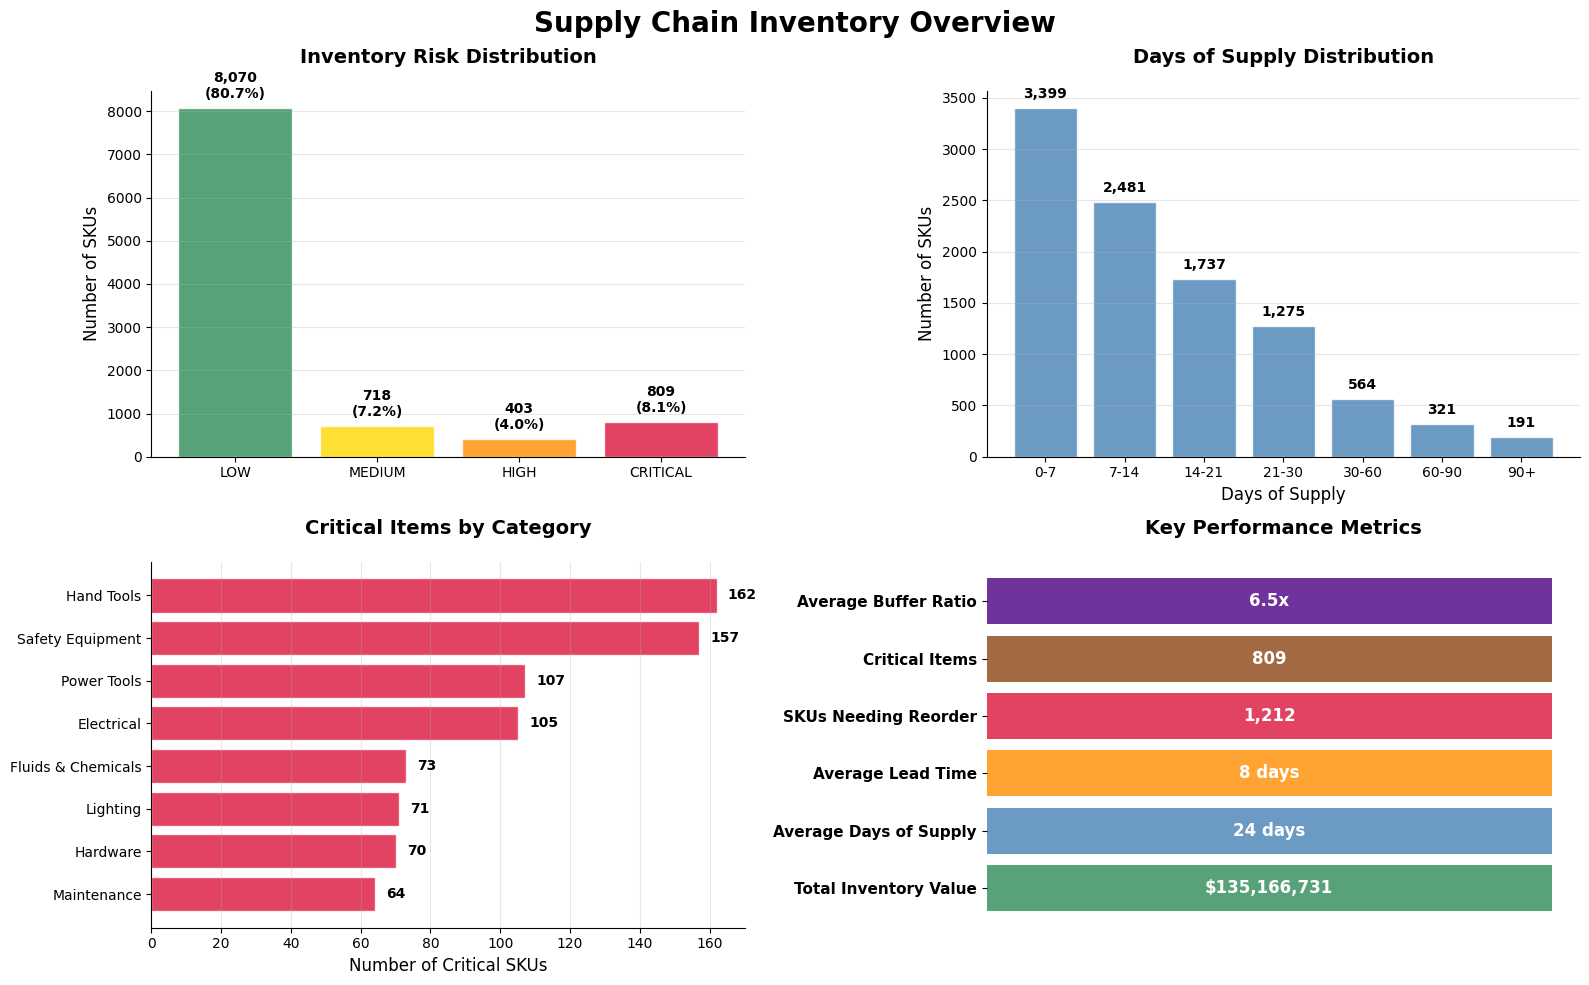

\n📊 DASHBOARD SUMMARY:
   • Total SKUs: 10,000
   • Critical Items: 809
   • Average Days of Supply: 24 days
   • Total Inventory Value: $135,166,731
   • Average Lead Time: 8 days
\n🎯 KEY INSIGHTS:
   • 809 critical items need immediate attention
   • 1,212 total SKUs need reordering
   • Average buffer ratio: 6.5x
   • Risk distribution: {'LOW': np.int64(8070), 'MEDIUM': np.int64(718), 'HIGH': np.int64(403), 'CRITICAL': np.int64(809)}
\n✅ Dashboard complete! Ready for optimization...
\n📦 CREATING OPTIMIZATION DATA...
   ✅ Optimization data created!
   📊 SKUs needing reorder: 1,212
   🚛 Weekly truck schedule: 4 weeks
\n💾 EXPORTING DATA...
   ✅ Saved CSV to: C:\Users\ethan\Downloads\classes\Leetcode\Supply_Chain_RL_Projects\Inventory_Optimization\data\optimization_data_export.csv
   ✅ Saved pickle to: C:\Users\ethan\Downloads\classes\Leetcode\Supply_Chain_RL_Projects\Inventory_Optimization\data\optimization_data_export.pkl


In [99]:
# CREATE THE CLEAN DASHBOARD
print("="*80)
print("📊 CLEAN SUPPLY CHAIN INVENTORY DASHBOARD")
print("="*80)

# Prepare data for visualization
inventory_summary = master_df.groupby('sku_id').agg({
    'qty_on_hand': 'mean',
    'reorder_point': 'mean',
    'safety_stock': 'mean',
    'base_demand': 'mean',
    'avg_actual_leadtime': 'mean',
    'unit_cost': 'mean',
    'profit_per_unit': 'mean',
    'category': 'first',
    'supplier_id': 'first'
}).round(2)

# Calculate daily usage and projected inventory
inventory_summary['daily_usage'] = (inventory_summary['base_demand'] / 7).round(1)
inventory_summary['projected_on_hand'] = (
    inventory_summary['qty_on_hand'] - 
    (inventory_summary['daily_usage'] * inventory_summary['avg_actual_leadtime'])
).round(0).clip(lower=0)

# Risk analysis - Use the latest week's data for each SKU to get current status
latest_week_data = master_df[master_df['week'] == master_df['week'].max()].copy()

# Calculate projected_on_hand for latest week data
latest_week_data['daily_usage'] = (latest_week_data['base_demand'] / 7).round(1)
latest_week_data['projected_on_hand'] = (
    latest_week_data['qty_on_hand'] - 
    (latest_week_data['daily_usage'] * latest_week_data.get('avg_actual_leadtime', latest_week_data['avg_lead_time_days']))
).round(0).clip(lower=0)

# Calculate buffer ratio
latest_week_data['buffer_ratio'] = (latest_week_data['projected_on_hand'] / latest_week_data['safety_stock']).round(2)
latest_week_data['risk_level'] = latest_week_data.apply(
    lambda row: 'CRITICAL' if row['buffer_ratio'] < 1.2
    else 'HIGH' if row['buffer_ratio'] < 1.5
    else 'MEDIUM' if row['buffer_ratio'] < 2.0
    else 'LOW', axis=1
)

# Merge the risk level back to inventory_summary
inventory_summary = inventory_summary.merge(
    latest_week_data[['sku_id', 'buffer_ratio', 'risk_level']], 
    left_index=True, 
    right_on='sku_id', 
    how='left'
).set_index('sku_id')

# Prepare data for clean dashboard
critical_items = latest_week_data[latest_week_data['risk_level'] == 'CRITICAL']
reorder_candidates = latest_week_data[
    (latest_week_data['risk_level'].isin(['CRITICAL', 'HIGH'])) | 
    (latest_week_data['qty_on_hand'] < latest_week_data['reorder_point'])
].copy()

# Create clean, professional dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Supply Chain Inventory Overview', fontsize=20, fontweight='bold', y=0.98)
fig.patch.set_facecolor('white')

# Adjust spacing to prevent title overlap
plt.subplots_adjust(top=0.92, hspace=0.35, wspace=0.25)

# Plot 1: Risk Level Distribution (Clean & Professional)
risk_counts = latest_week_data['risk_level'].value_counts().reindex(['LOW', 'MEDIUM', 'HIGH', 'CRITICAL'])
colors = ['#2E8B57', '#FFD700', '#FF8C00', '#DC143C']  # Green, Yellow, Orange, Red
bars = axes[0, 0].bar(risk_counts.index, risk_counts.values, 
                      color=colors, alpha=0.8, edgecolor='white', linewidth=1)
axes[0, 0].set_title('Inventory Risk Distribution', fontsize=14, fontweight='bold', pad=20)
axes[0, 0].set_ylabel('Number of SKUs', fontsize=12)
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)

# Add clean value labels with percentages
total_skus = risk_counts.sum()
for bar, value in zip(bars, risk_counts.values):
    pct = (value / total_skus) * 100
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(risk_counts.values)*0.02,
                    f'{value:,}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Plot 2: Days of Supply Distribution (Simplified & Clean)
# Create cleaner bins and better visualization
supply_bins = [0, 7, 14, 21, 30, 60, 90, float('inf')]
supply_labels = ['0-7', '7-14', '14-21', '21-30', '30-60', '60-90', '90+']
supply_counts = pd.cut(latest_week_data['days_of_supply'], bins=supply_bins, labels=supply_labels).value_counts()

bars = axes[0, 1].bar(supply_labels, supply_counts.values, 
                      color='#4682B4', alpha=0.8, edgecolor='white', linewidth=1)
axes[0, 1].set_title('Days of Supply Distribution', fontsize=14, fontweight='bold', pad=20)
axes[0, 1].set_xlabel('Days of Supply', fontsize=12)
axes[0, 1].set_ylabel('Number of SKUs', fontsize=12)
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)

# Add value labels
for bar, value in zip(bars, supply_counts.values):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(supply_counts.values)*0.02,
                    f'{value:,}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Plot 3: Critical Items by Category (Clean & Focused)
critical_by_category = critical_items.groupby('category').size().sort_values(ascending=True)
bars = axes[1, 0].barh(critical_by_category.index, critical_by_category.values, 
                       color='#DC143C', alpha=0.8, edgecolor='white', linewidth=1)
axes[1, 0].set_title('Critical Items by Category', fontsize=14, fontweight='bold', pad=20)
axes[1, 0].set_xlabel('Number of Critical SKUs', fontsize=12)
axes[1, 0].grid(True, alpha=0.3, axis='x')
axes[1, 0].spines['top'].set_visible(False)
axes[1, 0].spines['right'].set_visible(False)

# Add value labels
for bar, value in zip(bars, critical_by_category.values):
    axes[1, 0].text(bar.get_width() + max(critical_by_category.values)*0.02, bar.get_y() + bar.get_height()/2,
                    f'{value:,}', ha='left', va='center', fontweight='bold', fontsize=10)

# Plot 4: Key Performance Metrics (Enhanced & Clean)
# Create a more professional metrics display
metrics_data = {
    'Total Inventory Value': f"${(latest_week_data['qty_on_hand'] * latest_week_data['unit_cost']).sum():,.0f}",
    'Average Days of Supply': f"{latest_week_data['days_of_supply'].mean():.0f} days",
    'Average Lead Time': f"{latest_week_data.get('avg_actual_leadtime', latest_week_data['avg_lead_time_days']).mean():.0f} days",
    'SKUs Needing Reorder': f"{len(reorder_candidates):,}",
    'Critical Items': f"{len(critical_items):,}",
    'Average Buffer Ratio': f"{latest_week_data['buffer_ratio'].mean():.1f}x"
}

# Create a clean table visualization
y_positions = np.arange(len(metrics_data))
metric_colors = ['#2E8B57', '#4682B4', '#FF8C00', '#DC143C', '#8B4513', '#4B0082']
bars = axes[1, 1].barh(y_positions, [1]*len(metrics_data), color=metric_colors, alpha=0.8)
axes[1, 1].set_yticks(y_positions)
axes[1, 1].set_yticklabels(list(metrics_data.keys()), fontsize=11, fontweight='bold')
axes[1, 1].set_xticks([])
axes[1, 1].set_title('Key Performance Metrics', fontsize=14, fontweight='bold', pad=20)
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].spines['bottom'].set_visible(False)
axes[1, 1].spines['left'].set_visible(False)

# Add metric values with better positioning
for i, (metric, value) in enumerate(metrics_data.items()):
    axes[1, 1].text(0.5, i, value, ha='center', va='center', fontsize=12, 
                    fontweight='bold', color='white')

# Clean up and finalize the dashboard
plt.tight_layout()
plt.show()

# Clean summary statistics
print(f"\\n📊 DASHBOARD SUMMARY:")
print(f"   • Total SKUs: {len(latest_week_data):,}")
print(f"   • Critical Items: {len(critical_items):,}")
print(f"   • Average Days of Supply: {latest_week_data['days_of_supply'].mean():.0f} days")
print(f"   • Total Inventory Value: ${(latest_week_data['qty_on_hand'] * latest_week_data['unit_cost']).sum():,.0f}")
print(f"   • Average Lead Time: {latest_week_data.get('avg_actual_leadtime', latest_week_data['avg_lead_time_days']).mean():.0f} days")

print(f"\\n🎯 KEY INSIGHTS:")
print(f"   • {len(critical_items):,} critical items need immediate attention")
print(f"   • {len(reorder_candidates):,} total SKUs need reordering")
print(f"   • Average buffer ratio: {latest_week_data['buffer_ratio'].mean():.1f}x")
print(f"   • Risk distribution: {dict(risk_counts)}")

print(f"\\n✅ Dashboard complete! Ready for optimization...")

# ===========================================================================
# OPTIMIZATION LIBRARY FOR TRUCKLOAD OPTIMIZATION
# ===========================================================================

def create_truckload_optimization_data(inventory_summary, master_df):
    """
    Create optimization-ready dataset for truckload optimization
    
    Parameters:
    - inventory_summary: SKU-level aggregated data
    - master_df: Full master dataset
    
    Returns:
    - opt_data: DataFrame ready for truckload optimization
    """
    
    # Use the latest week's data instead of averaged inventory_summary
    # This matches what the dashboard shows for critical items
    latest_week = master_df['week'].max()
    latest_week_data = master_df[master_df['week'] == latest_week].copy()
    
    # Calculate daily usage and projected on hand for latest week
    latest_week_data['daily_usage'] = (latest_week_data['base_demand'] / 7).round(1)
    latest_week_data['projected_on_hand'] = (
        latest_week_data['qty_on_hand'] - 
        (latest_week_data['daily_usage'] * latest_week_data.get('avg_actual_leadtime', latest_week_data['avg_lead_time_days']))
    ).round(0).clip(lower=0)
    
    # Calculate buffer ratio and risk level
    latest_week_data['buffer_ratio'] = (latest_week_data['projected_on_hand'] / latest_week_data['safety_stock']).round(2)
    latest_week_data['risk_level'] = latest_week_data.apply(
        lambda row: 'CRITICAL' if row['buffer_ratio'] < 1.2
        else 'HIGH' if row['buffer_ratio'] < 1.5
        else 'MEDIUM' if row['buffer_ratio'] < 2.0
        else 'LOW', axis=1
    )
    
    # Filter for SKUs that need reordering - MATCH DASHBOARD LOGIC
    # Include: HIGH/CRITICAL risk OR below reorder point
    low_inventory_skus = latest_week_data[
        (latest_week_data['risk_level'].isin(['CRITICAL', 'HIGH'])) | 
        (latest_week_data['qty_on_hand'] < latest_week_data['reorder_point'])
    ].copy()
    
    # Check if we have any items to optimize
    if len(low_inventory_skus) == 0:
        print("⚠️ No SKUs need reordering at this time!")
        return pd.DataFrame()
    
    # Calculate urgency metrics
    low_inventory_skus['shortage_qty'] = (
        low_inventory_skus['reorder_point'] - low_inventory_skus['qty_on_hand']
    ).clip(lower=0)
    
    low_inventory_skus['days_until_runout'] = (
        low_inventory_skus['qty_on_hand'] / low_inventory_skus['daily_usage']
    ).replace([np.inf, -np.inf], 999).fillna(999).round(1)
    
    low_inventory_skus['urgency_score'] = (
        (1 / low_inventory_skus['days_until_runout'].replace(0, 0.01)) * 0.5 +  # Days until runout (higher = more urgent)
        (low_inventory_skus['shortage_qty'] / low_inventory_skus['reorder_point']) * 0.3 +  # Shortage ratio
        (low_inventory_skus['base_demand'] / low_inventory_skus['base_demand'].max()) * 0.2  # Demand volume
    )
    
    # We already have all the columns we need from latest_week_data
    # Just need to select relevant columns and rename index
    opt_data = low_inventory_skus.copy()
    opt_data = opt_data.set_index('sku_id', drop=False)
    
    # Truck constraints by supplier
    truck_constraints = {
        'SUP001': {'max_weight': 80000, 'max_volume': 4000, 'cost': 2500},
        'SUP002': {'max_weight': 60000, 'max_volume': 3000, 'cost': 2000},
        'SUP003': {'max_weight': 40000, 'max_volume': 2000, 'cost': 1500},
        'SUP004': {'max_weight': 65000, 'max_volume': 3200, 'cost': 2200},
        'SUP005': {'max_weight': 75000, 'max_volume': 3800, 'cost': 2300}
    }
    
    # Add truck capacity info
    opt_data['truck_max_weight'] = opt_data['supplier_id'].map(lambda x: truck_constraints.get(x, {}).get('max_weight', 40000))
    opt_data['truck_max_volume'] = opt_data['supplier_id'].map(lambda x: truck_constraints.get(x, {}).get('max_volume', 2000))
    opt_data['truck_cost'] = opt_data['supplier_id'].map(lambda x: truck_constraints.get(x, {}).get('cost', 1500))
    
    # Calculate order quantities needed
    opt_data['min_order_qty'] = opt_data['shortage_qty'].clip(lower=opt_data['min_order_qty'])
    opt_data['max_order_qty'] = opt_data['shortage_qty'] * 3  # Max 3x shortage
    
    # Priority classification
    opt_data['priority'] = opt_data.apply(
        lambda row: 'CRITICAL' if row['days_until_runout'] < 7
        else 'HIGH' if row['days_until_runout'] < 14
        else 'MEDIUM' if row['days_until_runout'] < 21
        else 'LOW', axis=1
    )
    
    return opt_data

def get_weekly_truck_schedule(opt_data, weeks_ahead=4):
    """
    Create weekly truck schedule based on urgency and deadlines
    
    Parameters:
    - opt_data: Optimization-ready data
    - weeks_ahead: Number of weeks to schedule
    
    Returns:
    - weekly_schedule: Dictionary with weekly truck assignments
    """
    
    weekly_schedule = {}
    
    for week in range(1, weeks_ahead + 1):
        week_deadline = week * 7  # Days from now
        
        # Items that will run out before this week's truck arrives
        urgent_items = opt_data[
            opt_data['days_until_runout'] <= week_deadline + 7  # Buffer for lead time
        ].copy()
        
        if len(urgent_items) > 0:
            # Group by supplier for truck assignment
            supplier_groups = urgent_items.groupby('supplier_id')
            
            weekly_trucks = {}
            for supplier, items in supplier_groups:
                # Check if we have enough urgent items to justify a truck
                total_weight = (items['min_order_qty'] * items['weight_lbs']).sum()
                total_volume = (items['min_order_qty'] * items['volume_cuft']).sum()
                truck_capacity_weight = items['truck_max_weight'].iloc[0]
                truck_capacity_volume = items['truck_max_volume'].iloc[0]
                
                # Only schedule truck if we have meaningful capacity utilization
                if (total_weight >= truck_capacity_weight * 0.6 or 
                    total_volume >= truck_capacity_volume * 0.6):
                    weekly_trucks[supplier] = {
                        'items': items,
                        'estimated_weight': total_weight,
                        'estimated_volume': total_volume,
                        'truck_cost': items['truck_cost'].iloc[0]
                    }
            
            if weekly_trucks:
                weekly_schedule[f'Week_{week}'] = weekly_trucks
    
    return weekly_schedule

# Create optimization data for truckload optimization
print(f"\\n📦 CREATING OPTIMIZATION DATA...")

try:
    optimization_data = create_truckload_optimization_data(inventory_summary, master_df)
    
    if len(optimization_data) == 0:
        print(f"   ⚠️ No SKUs need reordering - all inventory levels are healthy!")
    else:
        weekly_schedule = get_weekly_truck_schedule(optimization_data)
        
        print(f"   ✅ Optimization data created!")
        print(f"   📊 SKUs needing reorder: {len(optimization_data):,}")
        print(f"   🚛 Weekly truck schedule: {len(weekly_schedule)} weeks")
        
        # Export optimization data for use in other notebooks
        print(f"\\n💾 EXPORTING DATA...")
        
        # Create data directory if it doesn't exist
        import os
        data_dir = r"C:\Users\ethan\Downloads\classes\Leetcode\Supply_Chain_RL_Projects\Inventory_Optimization\data"
        os.makedirs(data_dir, exist_ok=True)
        
        # Save to CSV for easy import
        export_path = os.path.join(data_dir, 'optimization_data_export.csv')
        optimization_data.to_csv(export_path)
        print(f"   ✅ Saved CSV to: {export_path}")
        
        # Also save as pickle to preserve data types
        import pickle
        pickle_path = os.path.join(data_dir, 'optimization_data_export.pkl')
        try:
            with open(pickle_path, 'wb') as f:
                pickle.dump({
                    'optimization_data': optimization_data,
                    'weekly_schedule': weekly_schedule,
                    'inventory_summary': inventory_summary,
                    'master_df': master_df
                }, f)
            print(f"   ✅ Saved pickle to: {pickle_path}")
        except Exception as export_error:
            print(f"   ⚠️ Error saving pickle file: {str(export_error)}")
        
except Exception as e:
    print(f"   ❌ Error creating optimization data: {str(e)}")


In [98]:
# ===========================================================================
# DATA EXPORT FOR OPTIMIZATION NOTEBOOKS
# ===========================================================================

print("="*80)
print("💾 EXPORTING DATA FOR OPTIMIZATION NOTEBOOKS")
print("="*80)

import os
import pickle

# Define paths
data_dir = r"C:\Users\ethan\Downloads\classes\Leetcode\Supply_Chain_RL_Projects\Inventory_Optimization\data"
pickle_path = os.path.join(data_dir, 'optimization_data_export.pkl')

# Ensure directory exists
os.makedirs(data_dir, exist_ok=True)

try:
    # Create fresh optimization data
    print(f"   🔄 Creating fresh optimization data...")
    
    optimization_data_fresh = create_truckload_optimization_data(inventory_summary, master_df)
    print(f"   📊 Created optimization data: {len(optimization_data_fresh)} SKUs")
    
    if len(optimization_data_fresh) > 0:
        weekly_schedule_fresh = get_weekly_truck_schedule(optimization_data_fresh)
        print(f"   🚛 Created weekly schedule: {len(weekly_schedule_fresh)} weeks")
    else:
        weekly_schedule_fresh = {}
        print(f"   ⚠️ No trucks scheduled - no SKUs below reorder point")
    
    # Prepare data for export
    data_to_save = {
        'optimization_data': optimization_data_fresh,
        'weekly_schedule': weekly_schedule_fresh,
        'inventory_summary': inventory_summary,
        'master_df': master_df
    }
    
    # Save pickle file
    with open(pickle_path, 'wb') as f:
        pickle.dump(data_to_save, f)
    
    print(f"\n   ✅ Successfully saved data to:")
    print(f"      {pickle_path}")
    
    # Verify the file exists
    if os.path.exists(pickle_path):
        file_size = os.path.getsize(pickle_path) / (1024 * 1024)  # MB
        print(f"   ✅ File verified: {file_size:.2f} MB")
        
        # Show sample data if available
        if len(optimization_data_fresh) > 0:
            print(f"\n   📋 SAMPLE OPTIMIZATION DATA (Top 5 by urgency):")
            sample_cols = ['shortage_qty', 'days_until_runout', 'urgency_score', 'priority']
            sample_cols = [c for c in sample_cols if c in optimization_data_fresh.columns]
            print(optimization_data_fresh.nlargest(5, 'urgency_score')[sample_cols].to_string())
    else:
        print(f"\n   ❌ ERROR: File was not created!")
        
except Exception as e:
    print(f"   ❌ ERROR: {str(e)}")
    import traceback
    traceback.print_exc()


💾 EXPORTING DATA FOR OPTIMIZATION NOTEBOOKS
   🔄 Creating fresh optimization data...
   📊 Created optimization data: 1212 SKUs
   🚛 Created weekly schedule: 4 weeks

   ✅ Successfully saved data to:
      C:\Users\ethan\Downloads\classes\Leetcode\Supply_Chain_RL_Projects\Inventory_Optimization\data\optimization_data_export.pkl
   ✅ File verified: 168.94 MB

   📋 SAMPLE OPTIMIZATION DATA (Top 5 by urgency):
         shortage_qty  days_until_runout  urgency_score  priority
sku_id                                                           
SKU4567           177                0.0      50.462057  CRITICAL
SKU9043           130                0.0      50.450590  CRITICAL
SKU4647            89                0.0      50.449410  CRITICAL
SKU291             76                0.0      50.404384  CRITICAL
SKU9838            42                0.0      50.399157  CRITICAL
